# SparseEdges tests

## A series of tests for the SparseEdges package


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [2]:
%cd -q ../probe

In [3]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

In [4]:
#! defining framework
#!-------------------
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.MP_alpha=1.
mp.pe.do_whitening = False

## Defining units, axis and conventions

cardinal points in X, Y (clockwise):  E (=right=3 o'clock=horizontal), ESE, S, WSW, W, WNW, N, ENE :

In [5]:
X = np.array([0, 1./4, 1./2, 1./4, 0, -1./4, -1./2])#, -1./4])\n",
Y = np.array([1./2, np.sqrt(3)/4, 0, -np.sqrt(3)/4, -1./2, -np.sqrt(3)/4, 0.])#, np.sqrt(3)/
Theta = np.arctan2(-X, Y)  # perpendicular to circle
Theta = ((Theta + np.pi/2  - np.pi/mp.pe.N_phi/2 ) % (np.pi)) - np.pi/2  + np.pi/mp.pe.N_phi/2
print(['%0.1f' % (angle*180/np.pi) for angle in Theta])

['-0.0', '-30.0', '90.0', '30.0', '-0.0', '-30.0', '90.0']


We set the [0,0] index of the array in the upper left left corner of the axes.

The X, Y image axis are defined in the matrix style (origin on the upper left; X going vertically down, Y going right horizontally) - the angle is defined as the angle wrt to the horizontal axis :

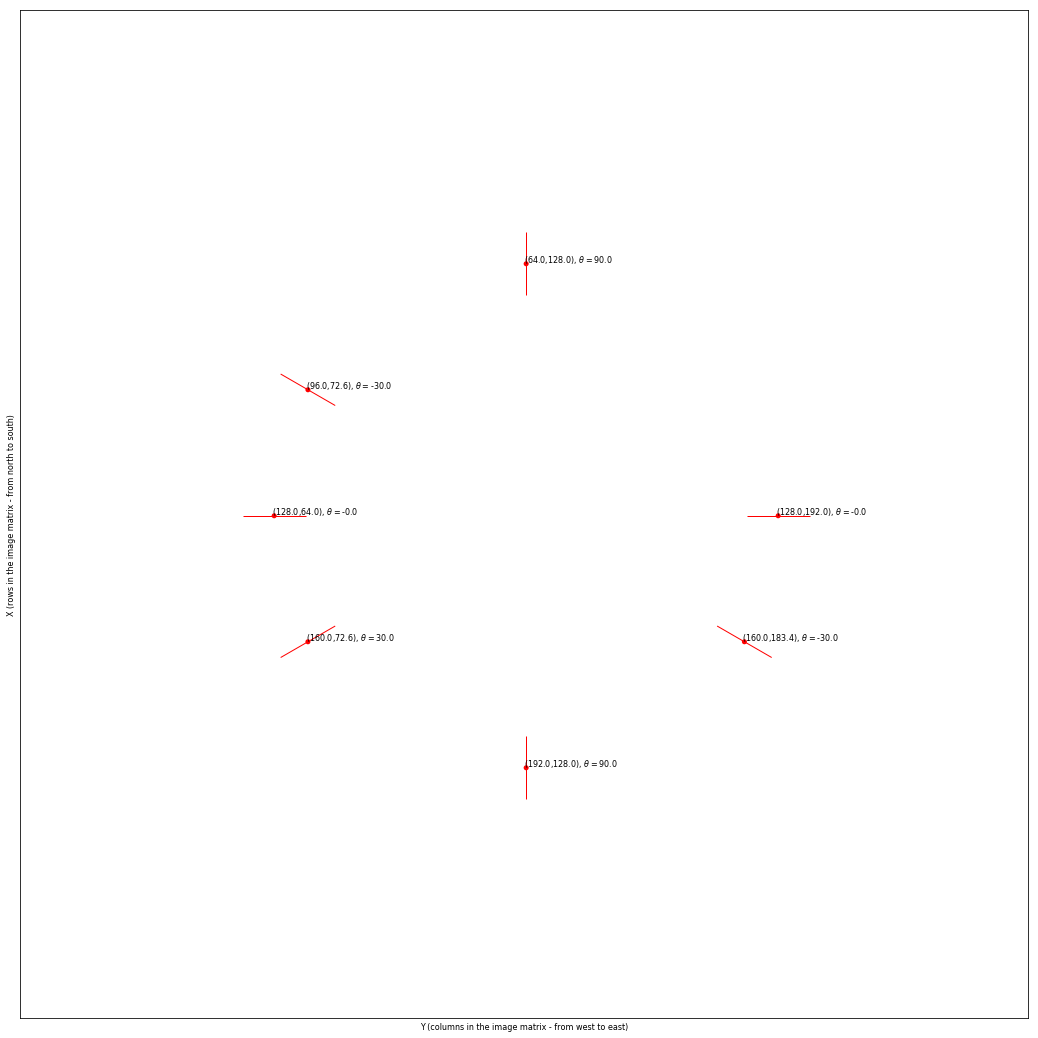

In [6]:
fig, a = mp.show_edges(np.vstack(((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) )))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (rows in the image matrix - from north to south)')

Overlaying an image :

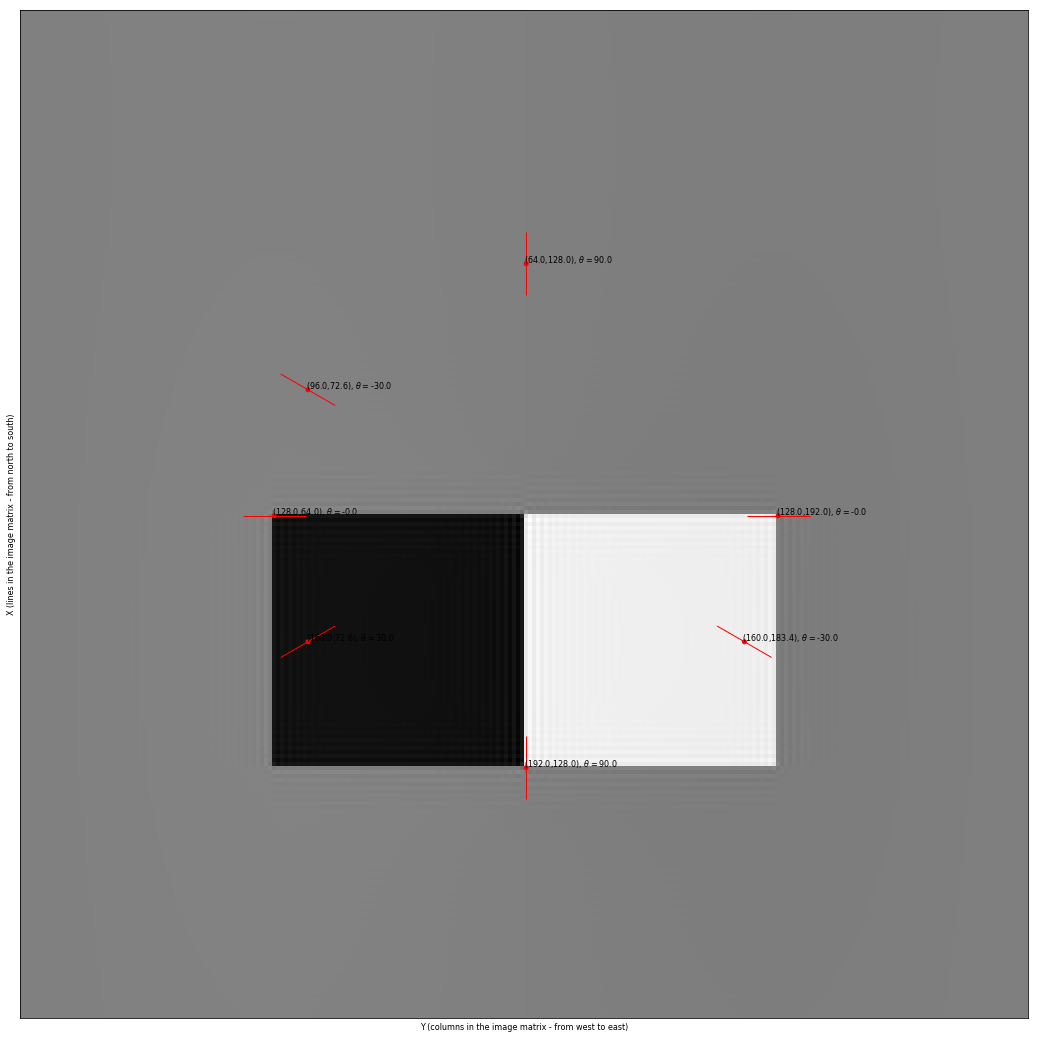

In [7]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

edges = np.vstack(((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=image)
#fig, a = mp.show_edges(edges, image=im.whitening(image))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (lines in the image matrix - from north to south)')

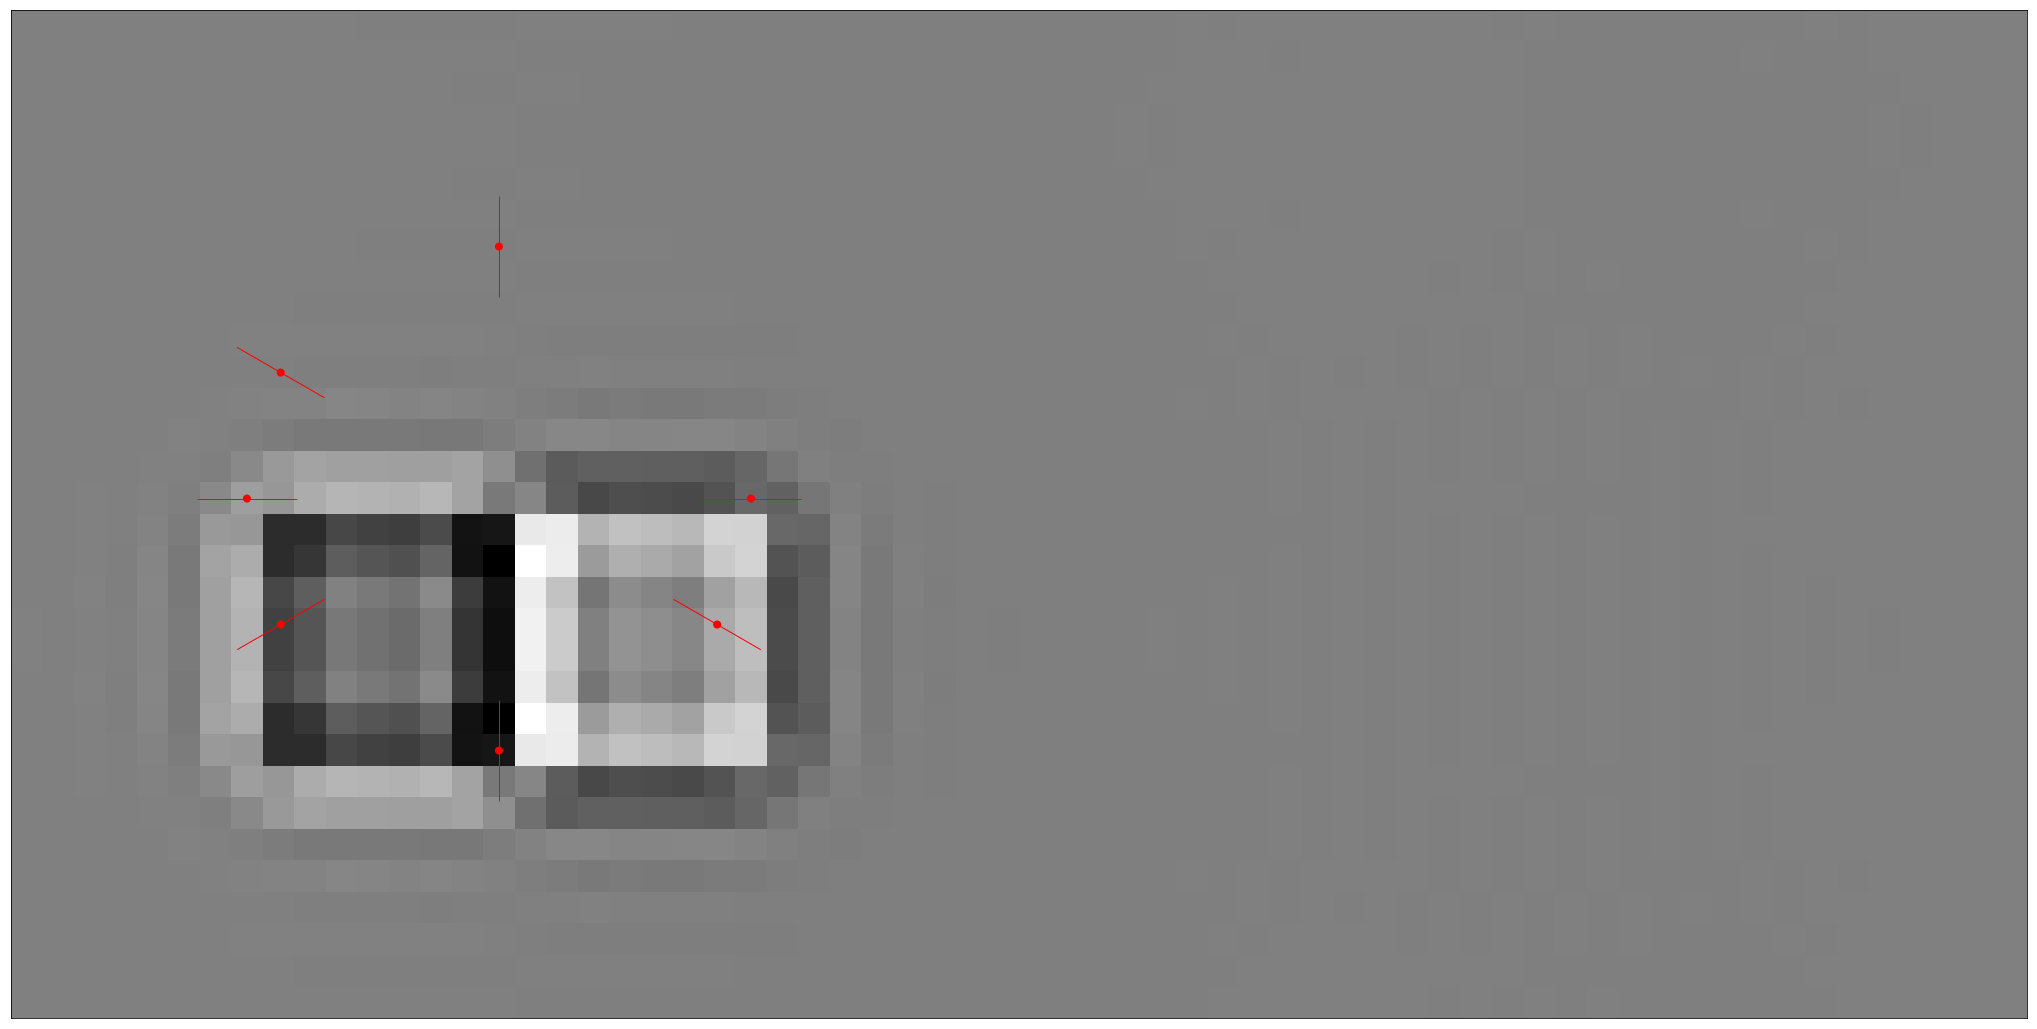

In [8]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.set_size((32, 64))
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 4.5

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

edges = np.vstack(((X/2. + .5)*mp.pe.N_X-1, (Y/2. + .5)*mp.pe.N_X-1, Theta, .5*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

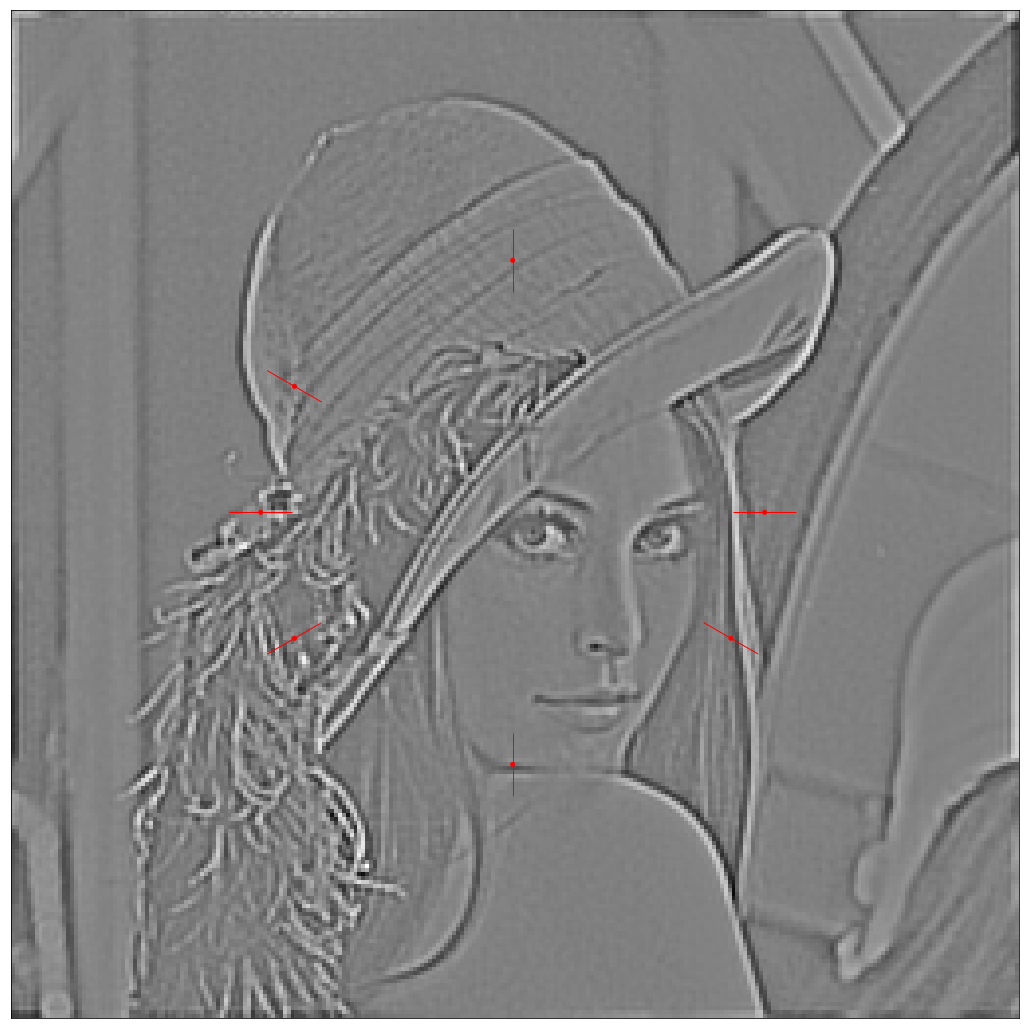

In [9]:
mp.set_size((256, 256))
image = mp.imread('../../SLIP/database/lena256.png')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

edges = np.vstack(((X/2. + .5)*mp.pe.N_X-1, (Y/2. + .5)*mp.pe.N_X-1, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

## Matching Pursuit

### checking basic edge detection

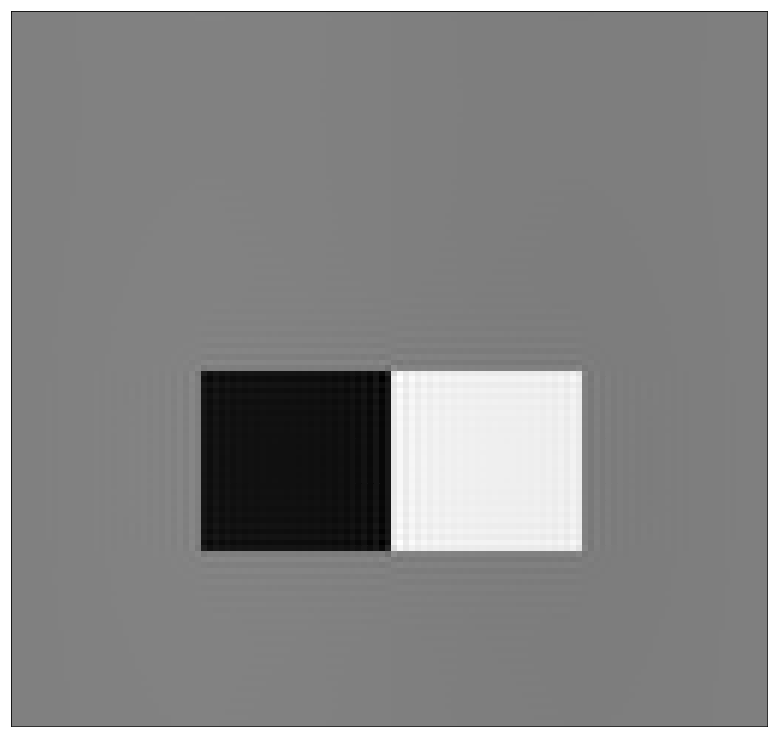

In [10]:
mp.set_size((128, 128))
#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1
mp.imshow(image);

In [11]:
%%writefile experiment_test_MP.py
import numpy as np
from SparseEdges import SparseEdges

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_MP.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    try:
        os.mkdir(mp.pe.matpath)
    except Exception:
        pass
    np.save(matname, edges)   


Overwriting experiment_test_MP.py


In [12]:
%run experiment_test_MP.py

Edge  0 / 128  - Max activity  :  5.75439981706  phase=  -132.590049548  deg,  @  (141, 127, 23, 2)
Edge  1 / 128  - Max activity  :  5.46269283452  phase=  -47.1685010049  deg,  @  (160, 128, 23, 2)
Edge  2 / 128  - Max activity  :  4.9899465351  phase=  -133.124265549  deg,  @  (177, 127, 23, 2)
Edge  3 / 128  - Max activity  :  4.01567595376  phase=  -43.3845608688  deg,  @  (132, 128, 23, 2)
Edge  4 / 128  - Max activity  :  3.75363439876  phase=  -135.89875354  deg,  @  (151, 127, 23, 2)
Edge  5 / 128  - Max activity  :  3.50017568197  phase=  -43.5170777744  deg,  @  (186, 128, 23, 2)
Edge  6 / 128  - Max activity  :  3.29160815113  phase=  -100.96943111  deg,  @  (157, 127, 23, 5)
Edge  7 / 128  - Max activity  :  3.03137631046  phase=  -148.003588953  deg,  @  (168, 127, 23, 1)
Edge  8 / 128  - Max activity  :  2.86863001657  phase=  -132.5994829  deg,  @  (127, 143, 11, 2)
Edge  9 / 128  - Max activity  :  2.86967282579  phase=  47.4005170999  deg,  @  (127, 112, 11, 2)
Edge  

Edge  82 / 128  - Max activity  :  0.81079349812  phase=  165.476534065  deg,  @  (190, 127, 2, 3)
Edge  83 / 128  - Max activity  :  0.802663266785  phase=  -131.657925079  deg,  @  (167, 127, 22, 3)
Edge  84 / 128  - Max activity  :  0.779892435329  phase=  -145.767871597  deg,  @  (191, 123, 11, 1)
Edge  85 / 128  - Max activity  :  0.774620538302  phase=  -25.1019958316  deg,  @  (190, 128, 20, 3)
Edge  86 / 128  - Max activity  :  0.774440919553  phase=  11.7600448063  deg,  @  (125, 110, 11, 4)
Edge  87 / 128  - Max activity  :  0.75674312203  phase=  -169.46384226  deg,  @  (125, 144, 11, 4)
Edge  88 / 128  - Max activity  :  0.756423070595  phase=  89.8039592368  deg,  @  (146, 123, 23, 3)
Edge  89 / 128  - Max activity  :  0.721163212673  phase=  69.4462893624  deg,  @  (137, 132, 23, 3)
Edge  90 / 128  - Max activity  :  0.697341736657  phase=  34.7131365003  deg,  @  (191, 132, 11, 1)
Edge  91 / 128  - Max activity  :  0.692225855034  phase=  32.5621807801  deg,  @  (127, 69

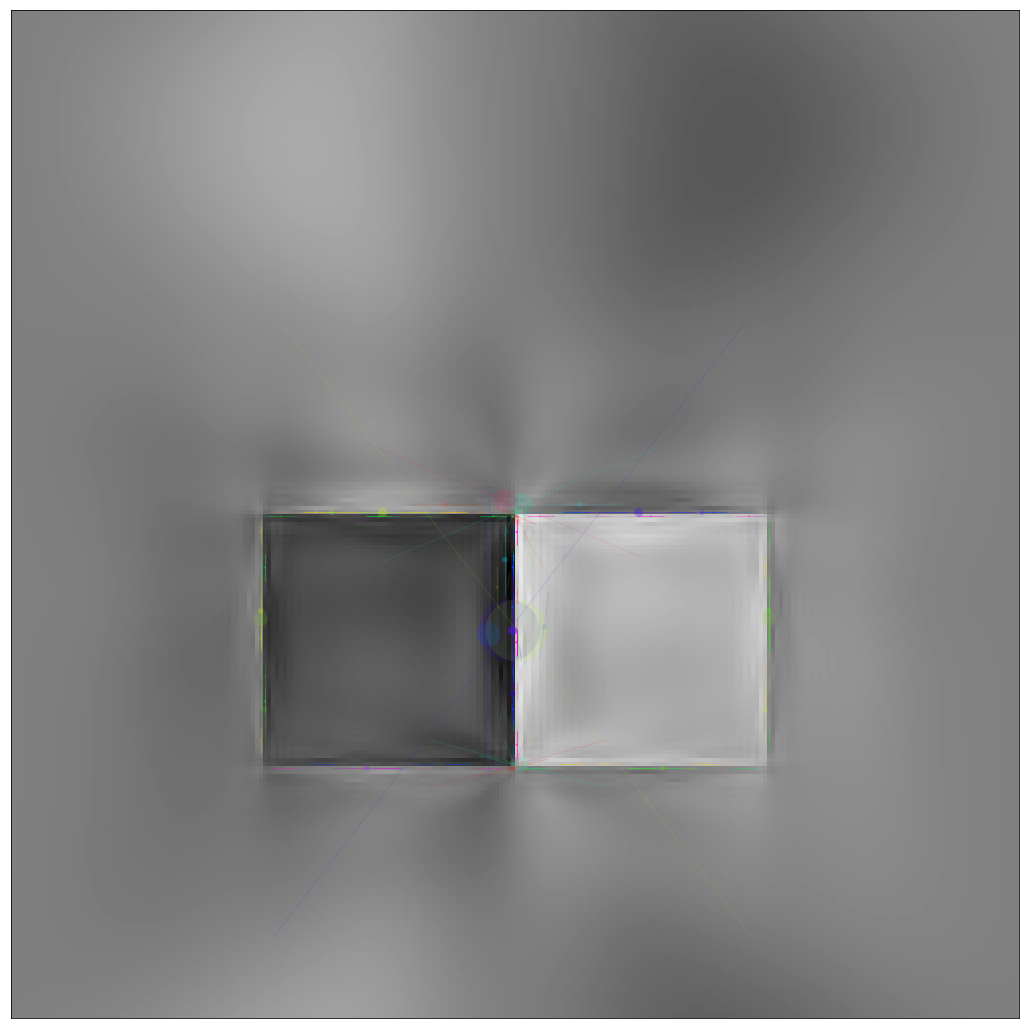

In [13]:
#fig, a = mp.show_edges(edges, image=mp.whitening(image))
fig, a = mp.show_edges(edges, image=mp.dewhitening(mp.reconstruct(edges)))

In [14]:
%%writefile experiment_test_whitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 256

image = mp.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg')

#print image.mean(), image.std()
image = mp.normalize(image, center=True)
#print image.mean(), image.std()
import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_whitening.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    


matname_RMSE = os.path.join(mp.pe.matpath, 'experiment_test_whitening_RMSE.npy')
try:
    RMSE = np.load(matname_RMSE)
except Exception:
    RMSE = np.ones(mp.pe.N)
    image_ = image.copy()
    image_rec = np.zeros_like(image_)
    if mp.pe.do_whitening: image_ = mp.whitening(image_)
    for i_N in range(mp.pe.N):
        image_rec += mp.reconstruct(edges[:, i_N][:, np.newaxis])
        RMSE[i_N] =  ((image_*mp.mask-image_rec*mp.mask)**2).sum()

    np.save(matname_RMSE, RMSE)     


Overwriting experiment_test_whitening.py


In [15]:
%run experiment_test_whitening.py

Edge  0 / 256  - Max activity  :  3.72818566722  phase=  90.0321428175  deg,  @  (142, 137, 0, 2)
Edge  1 / 256  - Max activity  :  3.49796704114  phase=  -144.082039649  deg,  @  (175, 85, 2, 2)
Edge  2 / 256  - Max activity  :  3.29960115775  phase=  -75.7765844867  deg,  @  (153, 142, 21, 3)
Edge  3 / 256  - Max activity  :  2.82953033362  phase=  85.4151891583  deg,  @  (149, 118, 8, 3)
Edge  4 / 256  - Max activity  :  2.71439400138  phase=  -125.007057106  deg,  @  (162, 168, 4, 3)
Edge  5 / 256  - Max activity  :  2.491678885  phase=  -70.4410936329  deg,  @  (180, 135, 21, 3)
Edge  6 / 256  - Max activity  :  2.44592039906  phase=  -115.908650469  deg,  @  (159, 187, 1, 2)
Edge  7 / 256  - Max activity  :  2.44330030792  phase=  -163.510071634  deg,  @  (177, 186, 7, 3)
Edge  8 / 256  - Max activity  :  2.40405411131  phase=  102.350097861  deg,  @  (137, 97, 6, 3)
Edge  9 / 256  - Max activity  :  2.21463903226  phase=  -2.20803646698  deg,  @  (162, 122, 20, 2)
Edge  10 / 256

Edge  83 / 256  - Max activity  :  1.03963722325  phase=  -105.19278665  deg,  @  (166, 171, 6, 1)
Edge  84 / 256  - Max activity  :  1.03390839707  phase=  -131.706361417  deg,  @  (160, 145, 14, 2)
Edge  85 / 256  - Max activity  :  1.02839665503  phase=  47.212405981  deg,  @  (97, 126, 1, 1)
Edge  86 / 256  - Max activity  :  1.02393963115  phase=  -72.0035334954  deg,  @  (90, 202, 3, 2)
Edge  87 / 256  - Max activity  :  1.02374306917  phase=  -64.0202475108  deg,  @  (187, 77, 12, 2)
Edge  88 / 256  - Max activity  :  1.00928858511  phase=  -122.174667591  deg,  @  (49, 142, 7, 2)
Edge  89 / 256  - Max activity  :  1.00524473096  phase=  83.4595270103  deg,  @  (219, 95, 6, 1)
Edge  90 / 256  - Max activity  :  0.999563040952  phase=  97.1250074311  deg,  @  (125, 139, 0, 1)
Edge  91 / 256  - Max activity  :  0.996351350412  phase=  -68.4558995744  deg,  @  (141, 212, 1, 3)
Edge  92 / 256  - Max activity  :  0.991507803931  phase=  118.949325159  deg,  @  (140, 101, 6, 1)
Edge  

Edge  165 / 256  - Max activity  :  0.793592509506  phase=  -93.729581886  deg,  @  (154, 159, 11, 2)
Edge  166 / 256  - Max activity  :  0.790265761298  phase=  89.9718707355  deg,  @  (151, 123, 9, 2)
Edge  167 / 256  - Max activity  :  0.789246212944  phase=  -108.819787795  deg,  @  (88, 213, 9, 2)
Edge  168 / 256  - Max activity  :  0.786175425351  phase=  -124.587328266  deg,  @  (82, 199, 3, 4)
Edge  169 / 256  - Max activity  :  0.785382790825  phase=  63.6840226378  deg,  @  (135, 132, 1, 1)
Edge  170 / 256  - Max activity  :  0.783941927078  phase=  -125.638929335  deg,  @  (196, 202, 3, 2)
Edge  171 / 256  - Max activity  :  0.782418116904  phase=  14.8125253061  deg,  @  (96, 214, 14, 2)
Edge  172 / 256  - Max activity  :  0.778853214201  phase=  62.7634837276  deg,  @  (122, 145, 2, 1)
Edge  173 / 256  - Max activity  :  0.773721648785  phase=  178.599191913  deg,  @  (164, 192, 23, 1)
Edge  174 / 256  - Max activity  :  0.772980518844  phase=  -123.205460104  deg,  @  (18

Edge  246 / 256  - Max activity  :  0.651355089985  phase=  83.873951117  deg,  @  (153, 138, 17, 2)
Edge  247 / 256  - Max activity  :  0.650687248432  phase=  83.1273294331  deg,  @  (210, 143, 0, 1)
Edge  248 / 256  - Max activity  :  0.648517885377  phase=  89.4531800273  deg,  @  (124, 154, 21, 2)
Edge  249 / 256  - Max activity  :  0.648349830189  phase=  135.877784444  deg,  @  (125, 153, 2, 2)
Edge  250 / 256  - Max activity  :  0.648164696375  phase=  -157.460771303  deg,  @  (148, 113, 7, 1)
Edge  251 / 256  - Max activity  :  0.647437037234  phase=  -149.712631661  deg,  @  (75, 119, 4, 1)
Edge  252 / 256  - Max activity  :  0.646347882468  phase=  151.841668772  deg,  @  (162, 166, 8, 3)
Edge  253 / 256  - Max activity  :  0.646001145341  phase=  -133.293326897  deg,  @  (111, 158, 13, 3)
Edge  254 / 256  - Max activity  :  0.644692202529  phase=  46.1227192116  deg,  @  (34, 126, 5, 2)
Edge  255 / 256  - Max activity  :  0.644265707914  phase=  -53.8617164926  deg,  @  (18

In [16]:
!ls -l  data_cache/experiment_test_whitening.npy data_cache/experiment_test_whitening_RMSE.npy

-rw-r--r--  1 lolo  staff  12368 Oct  6 15:27 data_cache/experiment_test_whitening.npy
-rw-r--r--  1 lolo  staff   2128 Oct  6 15:27 data_cache/experiment_test_whitening_RMSE.npy


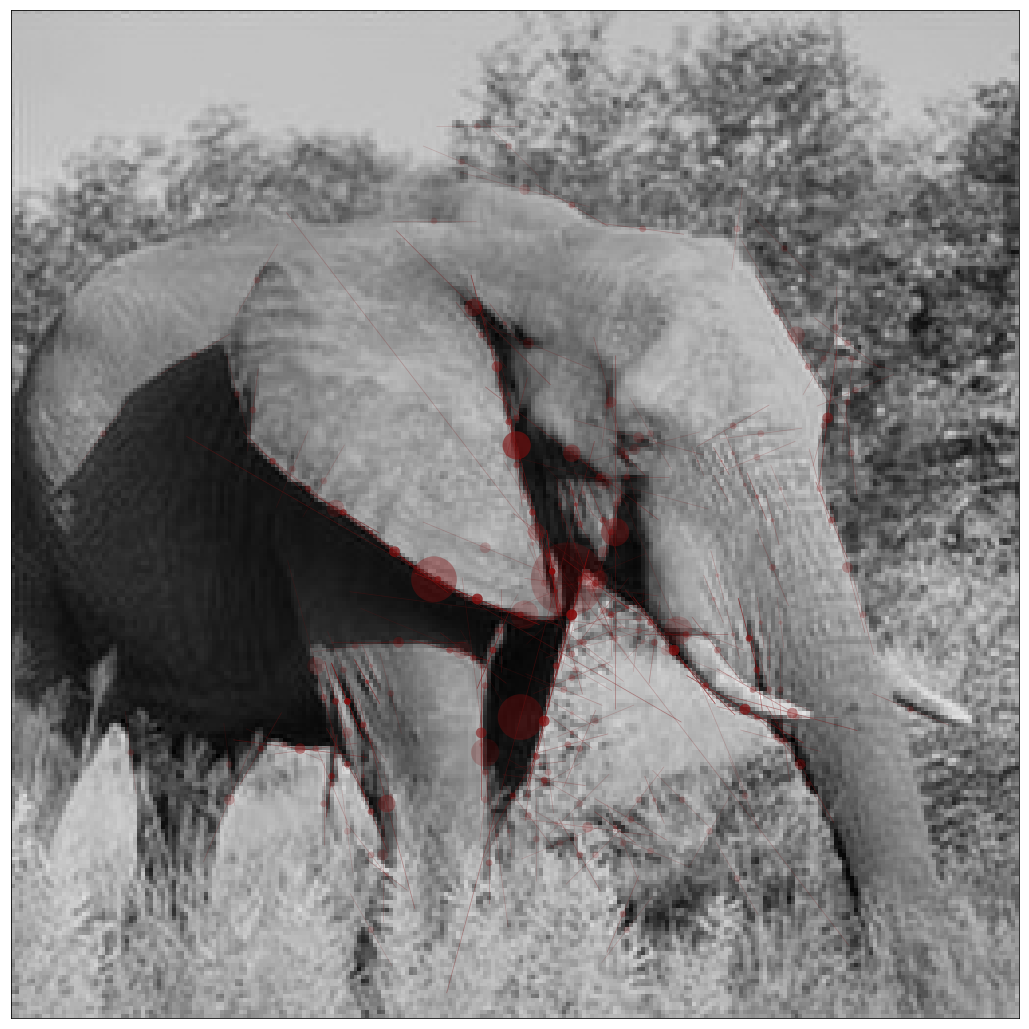

In [17]:
#edges[0, :] = pe.N_X - edges[0,:] # HACK
#edges[2, :] = - edges[2,:] # HACK
#edges[:, 119] = edges[:, 118] # HACK
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = .382 * fig_width
fig, a = mp.show_edges(edges, image=image, color='brown', show_phase=False) #, pedestal=.0, gamma=.3
import os
fig.savefig(os.path.join(mp.pe.figpath, 'SparseLets_A.pdf'))

RMSE-W =  0.787985497008


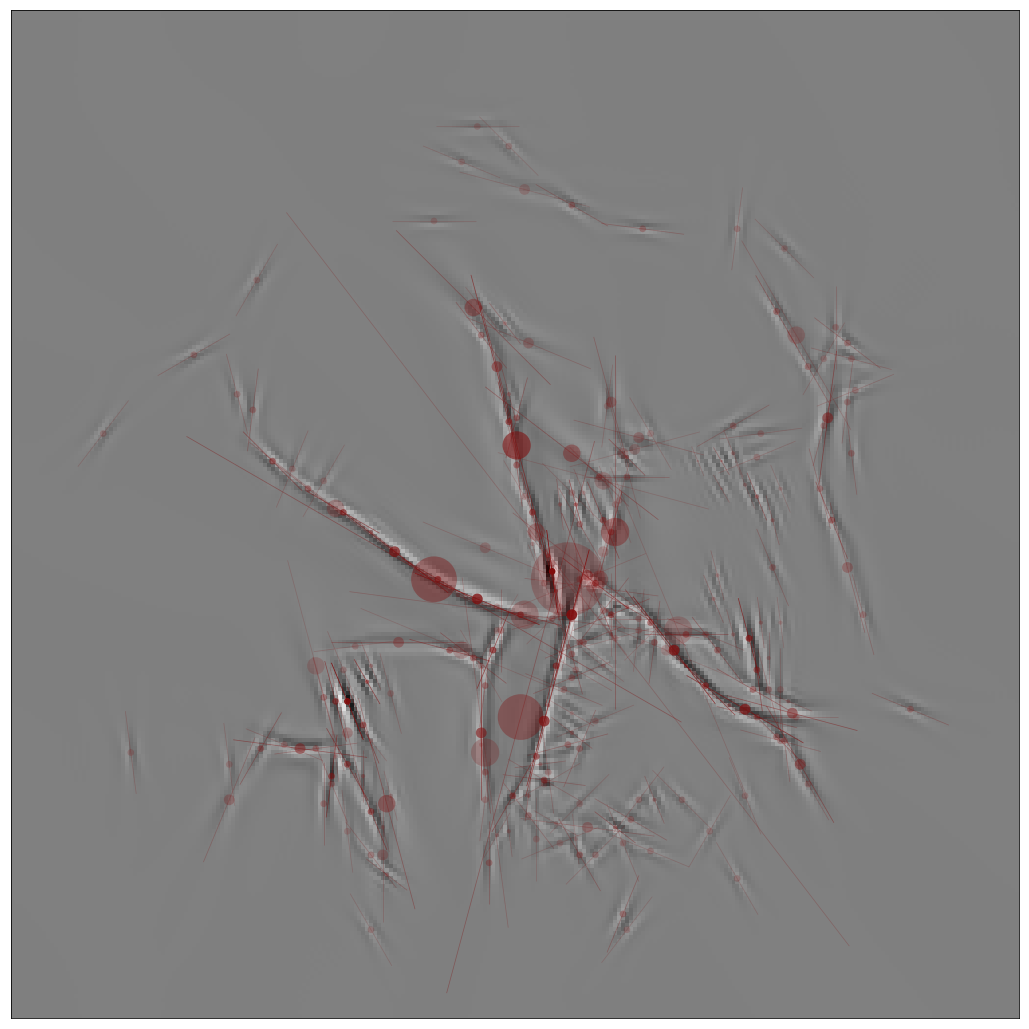

In [18]:
#! recontructing the image from the edges
image_rec = mp.reconstruct(edges)
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=image_rec*1., color='brown')

Recontructing the original image by dewhitening the reconstructed image:

RMSE-W =  0.787985497008


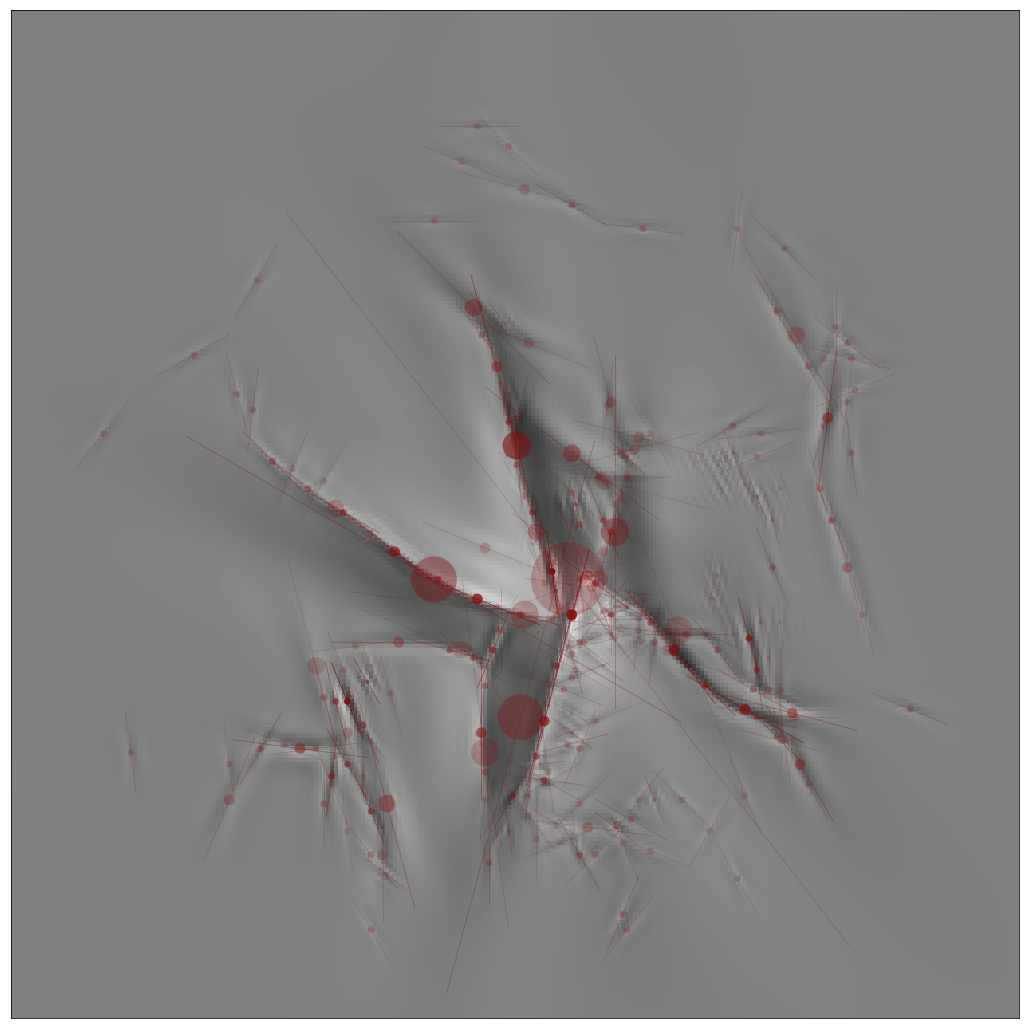

In [19]:
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec)*1., color='brown')

In [20]:
RMSE = np.load(os.path.join(mp.pe.matpath, 'experiment_test_whitening_RMSE.npy'))
print(RMSE.shape, mp.pe.N)

(256,) 256


-5.86499165206e-16 0.183764309115 47.0436631335 24.6726691138


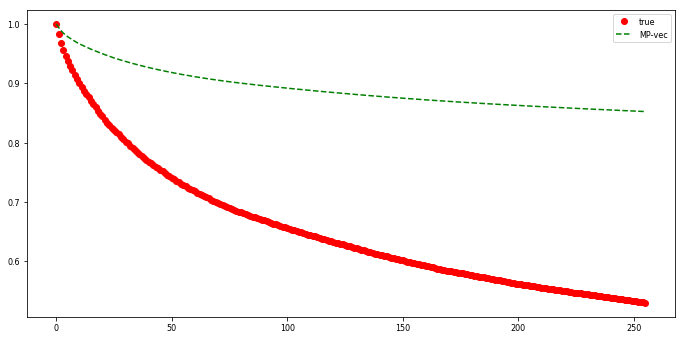

In [21]:
# checking the quick computation of the RMSE in MP
image_W = mp.whitening(image)
RMSE_0 = (image_W**2).sum()
print(image_W.mean(), image_W.std(), np.sqrt(RMSE_0), np.sqrt(RMSE[0]))
    

RMSE_MP = np.ones(mp.pe.N)
RMSE_MP[1:] = 1. - np.cumsum(edges[4, :-1]**2) * (2 -  mp.pe.MP_alpha)/mp.pe.MP_alpha / RMSE_0

plt.figure(figsize=(12,6))
plt.subplot(111)
plt.plot(RMSE/RMSE[0], 'ro', label='true')
plt.plot(RMSE_MP, 'g--', label='MP-vec')
plt.legend()

In [22]:
%%writefile experiment_test_nowhitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 256

#image = mp.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg')
image = mp.imread('../../SLIP/database/serre07_targets/B_N107001.jpg')


mp.pe.figsize_edges = 9
image = mp.normalize(image, center=True)

#! trying now using no whitening of the image
mp.pe.do_whitening = False

import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_nowhitening.npy')
matname_RMSE = os.path.join(mp.pe.matpath, 'experiment_test_nowhitening_RMSE.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    
    
fig, a = mp.show_edges(edges, image=image, mask=True)

Overwriting experiment_test_nowhitening.py


Edge  0 / 256  - Max activity  :  27.0381516272  phase=  -177.882667973  deg,  @  (146, 69, 9, 10)
Edge  1 / 256  - Max activity  :  19.666872725  phase=  -32.7706729816  deg,  @  (131, 125, 4, 8)
Edge  2 / 256  - Max activity  :  16.8668963607  phase=  -88.0473855078  deg,  @  (126, 248, 5, 10)
Edge  3 / 256  - Max activity  :  16.7473643169  phase=  -29.8045691937  deg,  @  (166, 168, 16, 9)
Edge  4 / 256  - Max activity  :  16.1578989374  phase=  145.789078343  deg,  @  (140, 131, 22, 8)
Edge  5 / 256  - Max activity  :  16.3124375345  phase=  165.399033661  deg,  @  (142, 63, 0, 10)
Edge  6 / 256  - Max activity  :  13.3983189992  phase=  111.051249314  deg,  @  (145, 108, 6, 7)
Edge  7 / 256  - Max activity  :  10.7769709761  phase=  -152.998593689  deg,  @  (168, 135, 19, 7)
Edge  8 / 256  - Max activity  :  9.97515569438  phase=  -156.892220004  deg,  @  (153, 125, 12, 9)
Edge  9 / 256  - Max activity  :  9.71525477273  phase=  -92.187058144  deg,  @  (109, 126, 2, 6)
Edge  10 /

Edge  83 / 256  - Max activity  :  1.75379284731  phase=  -19.9647072934  deg,  @  (143, 146, 2, 3)
Edge  84 / 256  - Max activity  :  1.73711270229  phase=  -71.284146155  deg,  @  (153, 142, 21, 2)
Edge  85 / 256  - Max activity  :  1.72120908566  phase=  -63.9245547417  deg,  @  (103, 125, 1, 3)
Edge  86 / 256  - Max activity  :  1.72034857764  phase=  65.4601535338  deg,  @  (127, 115, 3, 6)
Edge  87 / 256  - Max activity  :  1.71754820273  phase=  82.6757693893  deg,  @  (144, 108, 7, 2)
Edge  88 / 256  - Max activity  :  1.70157023335  phase=  121.510677066  deg,  @  (118, 155, 8, 5)
Edge  89 / 256  - Max activity  :  1.68108852457  phase=  138.401889189  deg,  @  (182, 139, 6, 9)
Edge  90 / 256  - Max activity  :  1.67301906076  phase=  -69.1472727113  deg,  @  (187, 73, 9, 4)
Edge  91 / 256  - Max activity  :  1.66713032941  phase=  0.23251856042  deg,  @  (162, 122, 20, 3)
Edge  92 / 256  - Max activity  :  1.66419551307  phase=  21.502475458  deg,  @  (98, 165, 11, 6)
Edge  9

Edge  165 / 256  - Max activity  :  1.03613745151  phase=  68.1566347189  deg,  @  (37, 119, 11, 5)
Edge  166 / 256  - Max activity  :  1.0353606948  phase=  -74.6879782451  deg,  @  (187, 75, 11, 2)
Edge  167 / 256  - Max activity  :  1.03329649204  phase=  161.640474407  deg,  @  (54, 148, 14, 6)
Edge  168 / 256  - Max activity  :  1.0322698454  phase=  110.591349961  deg,  @  (116, 13, 10, 7)
Edge  169 / 256  - Max activity  :  1.02554198826  phase=  -61.6488877124  deg,  @  (77, 194, 3, 3)
Edge  170 / 256  - Max activity  :  1.0232273818  phase=  -102.264619232  deg,  @  (178, 186, 8, 2)
Edge  171 / 256  - Max activity  :  1.01428120797  phase=  51.0424787702  deg,  @  (171, 228, 7, 5)
Edge  172 / 256  - Max activity  :  1.01105841831  phase=  166.288453893  deg,  @  (83, 126, 18, 6)
Edge  173 / 256  - Max activity  :  1.00831516924  phase=  103.938855212  deg,  @  (161, 167, 23, 4)
Edge  174 / 256  - Max activity  :  1.00772531972  phase=  77.7311404717  deg,  @  (38, 97, 7, 6)
Ed

Edge  247 / 256  - Max activity  :  0.764864542639  phase=  -140.880303212  deg,  @  (127, 96, 20, 4)
Edge  248 / 256  - Max activity  :  0.779553593934  phase=  -85.74150146  deg,  @  (116, 81, 19, 4)
Edge  249 / 256  - Max activity  :  0.761935255631  phase=  -172.53102643  deg,  @  (155, 100, 14, 8)
Edge  250 / 256  - Max activity  :  0.758014141547  phase=  139.273137872  deg,  @  (108, 158, 8, 3)
Edge  251 / 256  - Max activity  :  0.757967607186  phase=  23.2275606631  deg,  @  (200, 173, 1, 4)
Edge  252 / 256  - Max activity  :  0.757133738555  phase=  130.907799634  deg,  @  (132, 144, 4, 3)
Edge  253 / 256  - Max activity  :  0.756306155744  phase=  -131.333415403  deg,  @  (179, 192, 2, 3)
Edge  254 / 256  - Max activity  :  0.754141936864  phase=  34.3011816582  deg,  @  (112, 214, 1, 3)
Edge  255 / 256  - Max activity  :  0.75370013088  phase=  -90.4989594352  deg,  @  (139, 230, 10, 5)


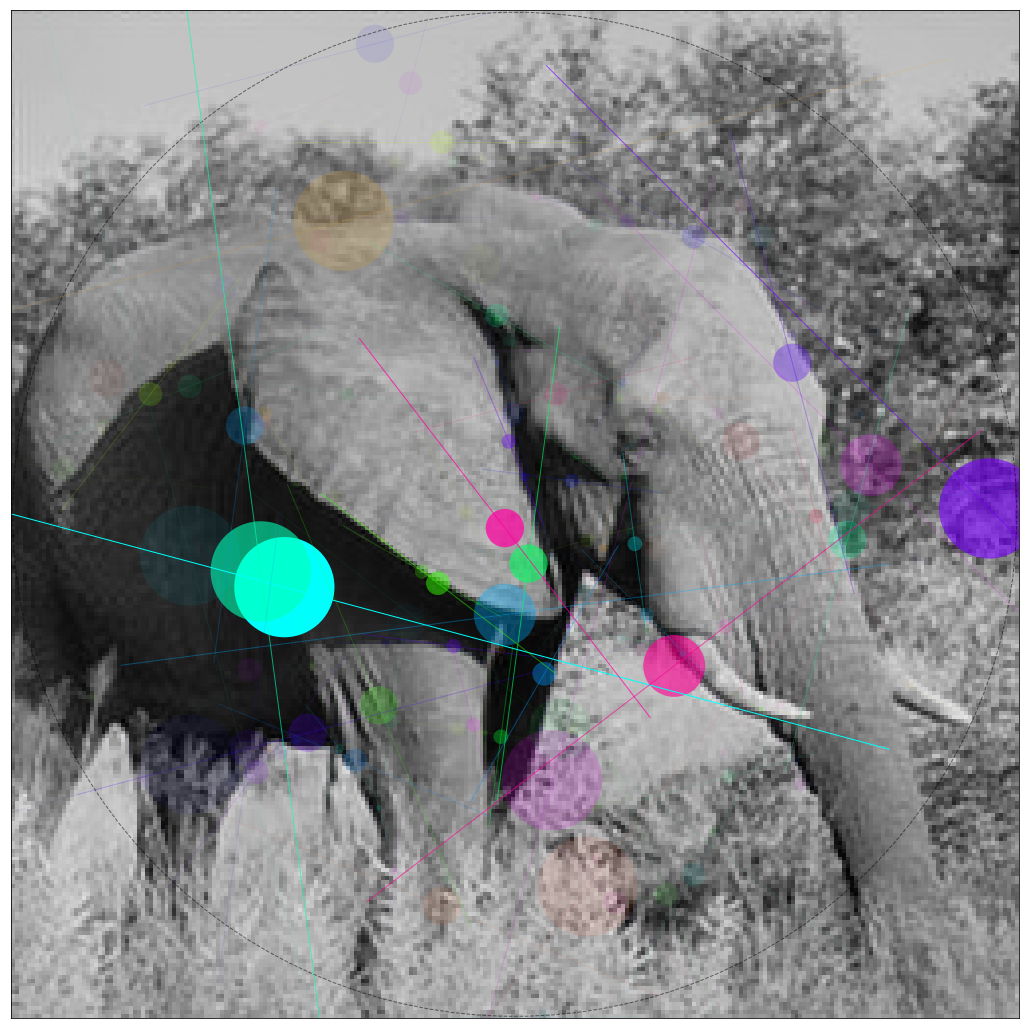

In [23]:
%run experiment_test_nowhitening.py


RMSE =  0.42195605747


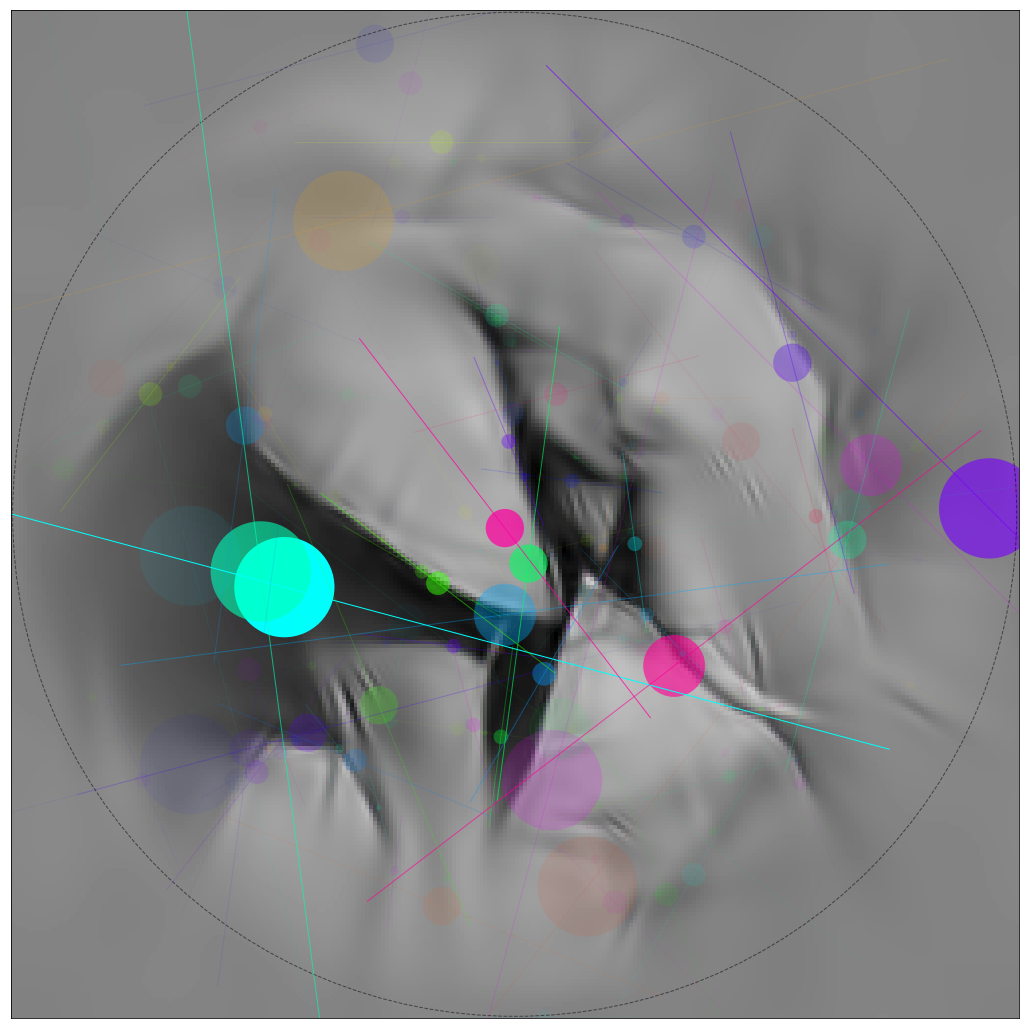

In [24]:
#! recontructing the image from the edges
image_ = mp.reconstruct(edges)
print('RMSE = ', ((image-image_)**2).sum()/((image)**2).sum())
fig, a = mp.show_edges(edges, image=image_*1., mask=True)

### Perspectives: Better fits of the filters

Basically, it is possible to infer the best possible log-Gabor function, even if it's parameters do not fall on the grid

0.01
initial_guess : [24, 42, 0.26179938779914935, 0.0081323268873787734] , idx : (24, 42, 13, 9)
popt : [  2.3627e+01   4.2358e+01   2.0970e-01   9.9979e-03] , true :  23.6 42.5 0.20943951023931953 0.01


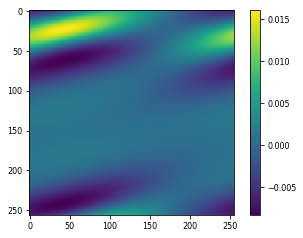

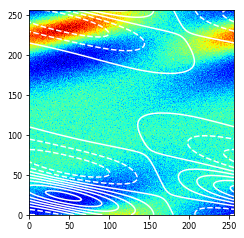

In [25]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
import scipy.optimize as opt

def twoD_Gaussian(xy, x_pos, y_pos, theta, sf_0):
    FT_lg = mp.loggabor(x_pos, y_pos, sf_0=np.absolute(sf_0), B_sf=mp.pe.B_sf, theta=theta, B_theta=mp.pe.B_theta)
    return mp.invert(FT_lg).ravel()

# Create x and y indices
x = np.arange(mp.pe.N_X)
y = np.arange(mp.pe.N_Y)
x, y = xy =  np.meshgrid(x, y)

#create data
x_pos, y_pos, theta, sf_0  = 23., 42., 142 * np.pi / 180., .01
x_pos, y_pos, theta, sf_0  = 23.6, 42.5, 12 * np.pi / 180., .01
print( sf_0)
data = twoD_Gaussian(xy, x_pos, y_pos, theta=theta, sf_0=sf_0)


# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(mp.pe.N_X, mp.pe.N_Y))
plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
data_noisy = data + 0.001*np.random.normal(size=data.shape)
# getting best match
C = mp.linear_pyramid(data_noisy.reshape(mp.pe.N_X, mp.pe.N_Y))
idx = mp.argmax(C)
initial_guess = [idx[0], idx[1], mp.theta[idx[2]], mp.sf_0[idx[3]]]
print ('initial_guess :', initial_guess, ', idx :', idx)

popt, pcov = opt.curve_fit(twoD_Gaussian, xy, data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian(xy, *popt)

extent = (0, mp.pe.N_X, 0, mp.pe.N_Y)
print ('popt :', popt, ', true : ', x_pos, y_pos, theta, sf_0)
fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(mp.pe.N_X, mp.pe.N_Y), cmap=plt.cm.jet, extent=extent)
_ = ax.contour(data_fitted.reshape(mp.pe.N_X, mp.pe.N_Y), 8, colors='w', extent=extent)

# TODO use a MLE to do the fit directly without scipy

## bonus: generating an unique seed for a given filename

In [26]:
# imagelist, edgeslist, RMSE = mp.process(exp='testing_vanilla', name_database='serre07_distractors')
# take one instance:
# filename, croparea  =  imagelist[0]
filename = 'https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg'
#print (filename,croparea, filename+str(croparea))
import os
import hashlib
str_ = filename #+ str(croparea)
hashlib.sha224(str_.encode('utf-8')).hexdigest()

'd9dee4e30946f8306a87b83b3a5723e9b9546e114e9f477025090ba2'

In [27]:
int("0x" +  hashlib.sha224((str_).encode('utf-8')).hexdigest(), 0)

22944460602011898315799355141800347746811032983635988259409876290466

In [28]:
np.random.seed(seed=int(int("0x" +  hashlib.sha224(str_.encode('utf-8')).hexdigest(), 0)*1. % 4294967295))

## some book keeping for the notebook

In [29]:
%load_ext watermark
%watermark

2017-10-06T15:40:41+02:00

CPython 3.6.3
IPython 6.2.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)
system     : Darwin
release    : 17.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [30]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, pillow, imageio

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]
IPython 6.2.1
OS Darwin 17.0.0 x86_64 i386 64bit
numpy 1.13.3
scipy 0.19.1
matplotlib 2.1.0rc1
sympy 1.1.1
pillow 4.3.0
imageio 2.1.2
Fri Oct 06 15:40:42 2017 CEST

In [31]:
%cd -q ../notebooks